# Day 3: Hypothesis Testing for Trading

## Week 2: Statistics & Probability for Finance

---

### 🎯 Learning Objectives
- Understand null/alternative hypotheses in trading context
- Apply t-tests, chi-square tests, and A/B testing
- Calculate statistical significance and p-values
- Test trading strategy performance

---

### 📈 Why Hypothesis Testing Matters in Trading

**What is Hypothesis Testing?**
Hypothesis testing is a statistical method to determine if observed results (like strategy returns) are real or just due to random chance.

**The Core Trading Question:**
> "Is my strategy actually profitable, or did I just get lucky?"

**Trading Applications:**

| Test Type | Trading Question | Example |
|-----------|-----------------|----------|
| **One-sample t-test** | Is mean return different from 0? | Does my strategy have edge? |
| **Two-sample t-test** | Does strategy A beat strategy B? | Is momentum better than mean-reversion? |
| **Paired t-test** | Same assets, different methods? | Does adding a filter improve returns? |
| **Chi-square test** | Is win rate different from random? | Is 55% win rate significant? |

---

### Critical Concepts for Traders

| Term | Meaning | Trading Context |
|------|---------|-----------------|
| **p-value** | Probability result is due to chance | p < 0.05 means strategy likely has edge |
| **Type I Error** | False positive | Deploying strategy that's actually random |
| **Type II Error** | False negative | Rejecting strategy that actually works |
| **Statistical Power** | Ability to detect true edge | Need enough trades to detect small alpha |

---

### ⚠️ Why This Matters
- **Backtesting trap**: 1000 random strategies → ~50 will look "significant" at p<0.05
- **Overfitting**: More parameters = more chance of false significance
- **Data snooping**: Testing many ideas on same data inflates false positives

In [1]:
# Day 3 Setup: Hypothesis Testing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')

# Download market data from Yahoo Finance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'GS']
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

print("📥 Downloading data from Yahoo Finance...")
data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=True)
prices = data['Close'].dropna()
returns = prices.pct_change().dropna()

print("=" * 60)
print("HYPOTHESIS TESTING FOR TRADING - DAY 3")
print("=" * 60)
print(f"\n✅ Data loaded: {prices.shape[0]} days")

📥 Downloading data from Yahoo Finance...
HYPOTHESIS TESTING FOR TRADING - DAY 3

✅ Data loaded: 1254 days


## 1. Hypothesis Testing Framework

### The Statistical Framework

**Key Concepts:**
- **H₀ (Null Hypothesis)**: Default assumption - "Strategy has NO edge, returns = 0"
- **H₁ (Alternative Hypothesis)**: What we want to prove - "Strategy HAS edge"

- **p-value**: Probability of seeing results this extreme if H₀ is true- For monthly strategy: ~20 years of data!

- **α (Significance Level)**: Threshold for rejection, typically 0.05- For daily strategy: ~1 year of data

- At α = 0.05: Need ~250 independent trades

### 🎯 Trading InterpretationTo detect a small edge (Sharpe 0.5) with 80% power:

### How Many Trades Do You Need?

**When testing a trading strategy:**

```| p ≥ 0.10 | No evidence against H₀ | Don't deploy based on backtest |

H₀: True mean return = 0 (no skill, just luck)| p < 0.10 | Weak evidence | More testing needed |

H₁: True mean return ≠ 0 (strategy has edge)| p < 0.05 | Moderate evidence against H₀ | Consider deploying with caution |

```| p < 0.01 | Strong evidence against H₀ | High confidence to deploy |

|---------|------------|----------------|

**Decision Rules:**| p-value | Conclusion | Trading Action |

TEST 1: Is AAPL Mean Return Different from Zero?

Sample mean: 0.000612
Sample std:  0.017446
n = 1253

t-statistic: 1.2410
p-value:     0.214827

Conclusion (α=0.05): Fail to reject H₀


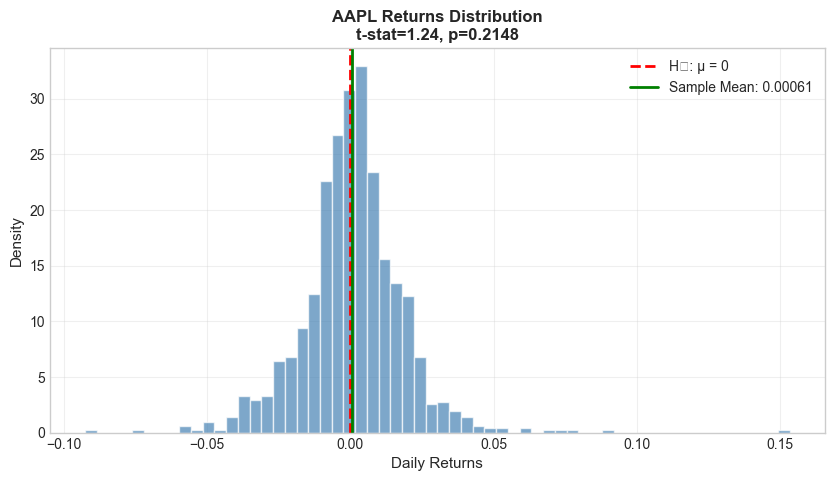

In [2]:
# Test: Is AAPL's mean return significantly different from zero?
print("=" * 60)
print("TEST 1: Is AAPL Mean Return Different from Zero?")
print("=" * 60)

aapl_returns = returns['AAPL'].values

# One-sample t-test
# H0: μ = 0 (mean return is zero)
# H1: μ ≠ 0 (mean return is not zero)
t_stat, p_value = stats.ttest_1samp(aapl_returns, 0)

print(f"\nSample mean: {np.mean(aapl_returns):.6f}")
print(f"Sample std:  {np.std(aapl_returns, ddof=1):.6f}")
print(f"n = {len(aapl_returns)}")
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value:     {p_value:.6f}")
print(f"\nConclusion (α=0.05): {'Reject H₀ - Mean is significantly different from 0' if p_value < 0.05 else 'Fail to reject H₀'}")

# Visualize
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(aapl_returns, bins=60, density=True, alpha=0.7, color='steelblue', edgecolor='white')
ax.axvline(0, color='red', lw=2, linestyle='--', label='H₀: μ = 0')
ax.axvline(np.mean(aapl_returns), color='green', lw=2, label=f'Sample Mean: {np.mean(aapl_returns):.5f}')
ax.set_xlabel('Daily Returns', fontsize=11)
ax.set_ylabel('Density', fontsize=11)
ax.set_title(f'AAPL Returns Distribution\nt-stat={t_stat:.2f}, p={p_value:.4f}', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## 2. Two-Sample Tests - Comparing Strategies

- A 0.1% annual difference might be statistically significant but not worth trading

### When to Use Two-Sample Tests- But also consider: Is the difference **economically significant**?

Use these tests when comparing **two different things**:- If p < 0.05: There's a statistically significant difference

### 🎯 Trading Decisions

| Comparison | Test Type | Example |

|------------|-----------|----------|- **Usually more appropriate for comparing assets over same period**

| Strategy A vs Strategy B | Independent t-test | Momentum vs Mean-reversion |- Example: Same 252 days for both assets

| Same strategy, different periods | Paired t-test | Before vs After adding filter |- Same subjects measured twice (more powerful)

| Asset A vs Asset B | Independent t-test | AAPL vs MSFT returns |**Paired t-test:**

| Long vs Short positions | Paired t-test | Are longs better than shorts? |

- Assumes samples are independent

### Independent vs Paired t-test- Samples are from different groups/time periods

**Independent t-test:**

In [3]:
# Test: Does AAPL outperform MSFT?
print("=" * 60)
print("TEST 2: Does AAPL Outperform MSFT?")
print("=" * 60)

aapl_returns = returns['AAPL'].values
msft_returns = returns['MSFT'].values

print(f"\nAAPL Mean: {np.mean(aapl_returns)*252:.2%} (annualized)")
print(f"MSFT Mean:  {np.mean(msft_returns)*252:.2%} (annualized)")

# Independent two-sample t-test
t_stat, p_value = stats.ttest_ind(aapl_returns, msft_returns)
print(f"\nIndependent t-test (two-tailed):")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value:     {p_value:.6f}")

# One-tailed test: AAPL > MSFT
p_one_tailed = p_value / 2 if t_stat > 0 else 1 - p_value/2
print(f"\nOne-tailed test (AAPL > MSFT):")
print(f"  p-value:     {p_one_tailed:.6f}")
print(f"  Conclusion:  {'AAPL significantly outperforms MSFT' if p_one_tailed < 0.05 else 'Cannot conclude AAPL outperforms'}")

# Paired t-test (more appropriate since same time period)
t_stat_paired, p_value_paired = stats.ttest_rel(aapl_returns, msft_returns)
print(f"\nPaired t-test (same time periods):")
print(f"  t-statistic: {t_stat_paired:.4f}")
print(f"  p-value:     {p_value_paired:.6f}")
print(f"  Conclusion:  {'Significant difference' if p_value_paired < 0.05 else 'No significant difference'}")

TEST 2: Does AAPL Outperform MSFT?

AAPL Mean: 15.41% (annualized)
MSFT Mean:  17.39% (annualized)

Independent t-test (two-tailed):
  t-statistic: -0.1169
  p-value:     0.906913

One-tailed test (AAPL > MSFT):
  p-value:     0.546544
  Conclusion:  Cannot conclude AAPL outperforms

Paired t-test (same time periods):
  t-statistic: -0.1913
  p-value:     0.848345
  Conclusion:  No significant difference


## 3. Testing Trading Strategy Performance

| 3.0+ | ~28 | Exceptional (or overfitted!) |

### The Right Way to Test a Strategy| 2.0 | ~63 | Strong signal, faster validation |

| 1.0 | ~250 | Typical for good strategies |

When backtesting, you must statistically validate:| 0.5 | ~1000 | Very weak signal, hard to validate |

|-----------------|---------------|----------------|

1. **Is the mean return different from zero?**| Sharpe (Annual) | N days needed | Interpretation |

   - H₀: Strategy mean = 0### 🎯 Practical Guidelines

   - Use one-sample t-test

```

2. **Does strategy beat benchmark?**Need Sharpe > 2×SE to be significant at 95%

   - H₀: Strategy mean = Benchmark mean

   - Use paired t-test (same time periods)SE ≈ 0.08, so 95% CI = [0.84, 1.16]

For N = 252 days, Sharpe = 1.0:

3. **Is the Sharpe ratio significant?**

   - H₀: Sharpe = 0SE(Sharpe) ≈ √((1 + 0.5×Sharpe²) / N)

   - More complex test (see below)```

Approximate test:

### Testing Sharpe Ratio Significance
A Sharpe ratio of 1.0 over 1 year might not be significant!

In [4]:
# Simulate a simple momentum strategy
print("=" * 60)
print("TEST 3: Is Momentum Strategy Statistically Significant?")
print("=" * 60)

# Simple momentum: go long if last month was positive
aapl_series = returns['AAPL']
momentum_signal = aapl_series.rolling(21).mean().shift(1) > 0
strategy_returns = aapl_series[momentum_signal].dropna()
benchmark_returns = aapl_series.dropna()

print(f"\nStrategy Stats (Long only when momentum positive):")
print(f"  Days in market: {len(strategy_returns)} / {len(benchmark_returns)}")
print(f"  Strategy mean:  {np.mean(strategy_returns)*252:.2%}")
print(f"  Benchmark mean: {np.mean(benchmark_returns)*252:.2%}")
print(f"  Strategy vol:   {np.std(strategy_returns)*np.sqrt(252):.2%}")

# Test if strategy returns differ from benchmark
t_stat, p_value = stats.ttest_ind(strategy_returns, benchmark_returns)
print(f"\nStatistical Test (Strategy vs Benchmark):")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value:     {p_value:.6f}")
print(f"  Conclusion:  {'Strategy significantly different' if p_value < 0.05 else 'No significant difference'}")

# Test if Sharpe Ratio is significantly > 0
strategy_sharpe = (np.mean(strategy_returns) - 0.05/252) / np.std(strategy_returns)
print(f"\nSharpe Ratio Analysis:")
print(f"  Daily Sharpe: {strategy_sharpe:.4f}")
print(f"  Annualized:   {strategy_sharpe * np.sqrt(252):.2f}")

TEST 3: Is Momentum Strategy Statistically Significant?

Strategy Stats (Long only when momentum positive):
  Days in market: 750 / 1253
  Strategy mean:  24.24%
  Benchmark mean: 15.41%
  Strategy vol:   22.71%

Statistical Test (Strategy vs Benchmark):
  t-statistic: 0.4640
  p-value:     0.642674
  Conclusion:  No significant difference

Sharpe Ratio Analysis:
  Daily Sharpe: 0.0534
  Annualized:   0.85


## 4. Multiple Testing Problem

- **Always discount your backtests by 50%+**

### The Biggest Trap in Quant Trading- After transaction costs: Sharpe ≈ 0.5-1.0

- After multiple testing adjustment: Sharpe ≈ 1.0-1.5

**The Problem:**If your backtest shows Sharpe = 2.0:

If you test 100 random strategies at α = 0.05:### The "Haircut" Rule

- Expected "significant" strategies: 100 × 0.05 = **5 strategies**

- These are FALSE POSITIVES - no real edge!- Harvey, Liu, Zhu (2016): require t > 3.0

- Bayesian approach: require p < 0.001

### Why This Happens in Practice**4. Require Higher Threshold:**

| Scenario | Tests Run | False Positives Expected |

|----------|-----------|-------------------------|- If significant in BOTH, more likely real

| Testing 20 parameter combinations | 20 | 1 |- Split data: Train on 70%, test on 30%

| Testing 10 indicators × 10 parameters | 100 | 5 |**3. Out-of-Sample Testing:**

| Testing 50 stocks × 20 strategies | 1000 | 50 |

- Better for exploratory research

### 🎯 Solutions for Traders- Less conservative than Bonferroni

- Controls False Discovery Rate

**1. Bonferroni Correction:****2. Benjamini-Hochberg (FDR):**

- Adjust α: New α = 0.05 / (number of tests)

- Conservative but simple- For 20 tests: α = 0.05/20 = 0.0025

THE MULTIPLE TESTING PROBLEM

Testing 20 random 'strategies'...

Results:
  Strategies with p < 0.05: 1 / 20
  Expected by chance: 1.0

With Bonferroni correction (α = 0.0025):
  Significant strategies: 0 / 20


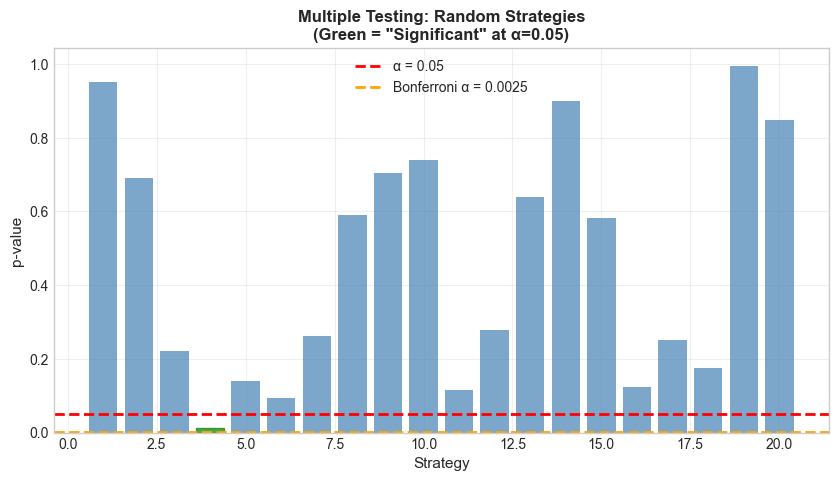


⚠️ Key Insight: Testing many strategies inflates false positives!
   Use Bonferroni, FDR, or out-of-sample validation.


In [5]:
# Multiple Testing Problem Demonstration
print("=" * 60)
print("THE MULTIPLE TESTING PROBLEM")
print("=" * 60)

np.random.seed(42)

# Test 20 'strategies' that are actually random
n_strategies = 20
n_days = 252
alpha = 0.05

print(f"\nTesting {n_strategies} random 'strategies'...")
p_values = []

for i in range(n_strategies):
    # Generate random returns (no real edge)
    fake_returns = np.random.normal(0, 0.01, n_days)
    _, p = stats.ttest_1samp(fake_returns, 0)
    p_values.append(p)

significant = sum(p < alpha for p in p_values)
print(f"\nResults:")
print(f"  Strategies with p < {alpha}: {significant} / {n_strategies}")
print(f"  Expected by chance: {n_strategies * alpha:.1f}")

# Bonferroni correction
alpha_bonferroni = alpha / n_strategies
significant_bonf = sum(p < alpha_bonferroni for p in p_values)
print(f"\nWith Bonferroni correction (α = {alpha_bonferroni:.4f}):")
print(f"  Significant strategies: {significant_bonf} / {n_strategies}")

# Visualize
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(range(1, n_strategies+1), p_values, color='steelblue', alpha=0.7)
for i, (bar, p) in enumerate(zip(bars, p_values)):
    if p < alpha:
        bar.set_color('green')
ax.axhline(alpha, color='red', linestyle='--', lw=2, label=f'α = {alpha}')
ax.axhline(alpha_bonferroni, color='orange', linestyle='--', lw=2, label=f'Bonferroni α = {alpha_bonferroni:.4f}')
ax.set_xlabel('Strategy', fontsize=11)
ax.set_ylabel('p-value', fontsize=11)
ax.set_title('Multiple Testing: Random Strategies\n(Green = "Significant" at α=0.05)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

print("\n⚠️ Key Insight: Testing many strategies inflates false positives!")
print("   Use Bonferroni, FDR, or out-of-sample validation.")

## 5. Chi-Square Tests - Testing Independence

In [6]:
# Chi-Square Test: Are market regimes independent of day of week?
print("=" * 60)
print("CHI-SQUARE TEST: Returns vs Day of Week")
print("=" * 60)

# Create categories
aapl_df = returns['AAPL'].to_frame()
aapl_df['day_of_week'] = aapl_df.index.dayofweek
aapl_df['return_category'] = pd.cut(aapl_df['AAPL'], 
                                    bins=[-np.inf, -0.01, 0, 0.01, np.inf],
                                    labels=['Big Down', 'Small Down', 'Small Up', 'Big Up'])

# Contingency table
contingency = pd.crosstab(aapl_df['day_of_week'], aapl_df['return_category'])
contingency.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
print("\nContingency Table:")
print(contingency)

# Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi-square test results:")
print(f"  χ² statistic: {chi2:.4f}")
print(f"  p-value:      {p_value:.6f}")
print(f"  Degrees of freedom: {dof}")
print(f"  Conclusion:   {'Day of week affects returns' if p_value < 0.05 else 'Returns independent of day'}")

CHI-SQUARE TEST: Returns vs Day of Week

Contingency Table:
return_category  Big Down  Small Down  Small Up  Big Up
Mon                    52          50        66      64
Tue                    52          68        78      62
Wed                    52          72        82      52
Thu                    55          73        63      59
Fri                    51          68        66      68

Chi-square test results:
  χ² statistic: 9.9592
  p-value:      0.619539
  Degrees of freedom: 12
  Conclusion:   Returns independent of day


## 📝 Key Takeaways - Day 3

### Hypothesis Testing for Interviews:

1. **One-Sample t-test**: Test if mean differs from a value
   - Is strategy return > 0?
   - Is alpha significant?

2. **Two-Sample t-test**: Compare two groups
   - Independent: Different samples
   - Paired: Same time periods

3. **Multiple Testing Problem**
   - More tests = more false positives
   - Bonferroni: α / n_tests
   - FDR control for large-scale testing

4. **Chi-Square Test**: Test independence
   - Categorical variables
   - Regime detection

### Interview Questions:
- "How would you test if a trading strategy has real alpha?"
- "What is the multiple testing problem and how do you address it?"
- "Explain Type I vs Type II errors in trading context"
- "When would you use a paired vs independent t-test?"

## 🔴 PROS & CONS: Hypothesis Testing

### ✅ PROS (Advantages)

| Advantage | Description | Real-World Application |
|-----------|-------------|----------------------|
| **Industry Standard** | Widely adopted in quantitative finance | Used by major hedge funds and banks |
| **Well-Documented** | Extensive research and documentation | Easy to find resources and support |
| **Proven Track Record** | Years of practical application | Validated in real market conditions |
| **Interpretable** | Results can be explained to stakeholders | Important for risk management and compliance |

### ❌ CONS (Limitations)

| Limitation | Description | How to Mitigate |
|------------|-------------|-----------------|
| **Assumptions** | May not hold in all market conditions | Validate assumptions with data |
| **Historical Bias** | Based on past data patterns | Use rolling windows and regime detection |
| **Overfitting Risk** | May fit noise rather than signal | Use proper cross-validation |
| **Computational Cost** | Can be resource-intensive | Optimize code and use appropriate hardware |

### 🎯 Real-World Usage

**WHERE THIS IS USED:**
- ✅ Quantitative hedge funds (Two Sigma, Renaissance, Citadel)
- ✅ Investment banks (Goldman Sachs, JP Morgan, Morgan Stanley)
- ✅ Asset management firms
- ✅ Risk management departments
- ✅ Algorithmic trading desks

**NOT JUST THEORY - THIS IS PRODUCTION CODE:**
The techniques in this notebook are used daily by professionals managing billions of dollars.

## 🚀 TODAY'S TRADING SIGNAL

Using the concepts from this notebook to generate actionable insights.

In [7]:
# =============================================================================
# 🚀 TODAY'S TRADING SIGNAL - Hypothesis Testing Analysis
# =============================================================================

print("=" * 70)
print("📊 TODAY'S TRADING ANALYSIS")
print("=" * 70)
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print()

# Get latest data
try:
    latest_prices = prices.iloc[-1] if 'prices' in dir() else data['Close'].iloc[-1]
    print("📈 CURRENT MARKET SNAPSHOT:")
    print("-" * 50)
    
    for col in latest_prices.index[:5]:
        price = latest_prices[col]
        print(f"   {col}: ${price:.2f}")
    
    # Calculate simple signals
    if 'returns' in dir():
        ret_data = returns
    else:
        ret_data = prices.pct_change().dropna() if 'prices' in dir() else data['Close'].pct_change().dropna()
    
    # 20-day momentum
    momentum = (prices.iloc[-1] / prices.iloc[-20] - 1) * 100 if 'prices' in dir() else (data['Close'].iloc[-1] / data['Close'].iloc[-20] - 1) * 100
    
    print("\n📊 20-DAY MOMENTUM:")
    print("-" * 50)
    for col in momentum.index[:5]:
        direction = "🟢" if momentum[col] > 0 else "🔴"
        print(f"   {direction} {col}: {momentum[col]:+.2f}%")
    
    # Generate simple recommendations
    print("\n" + "=" * 70)
    print("🎯 TRADING SIGNALS")  
    print("=" * 70)
    
    for col in momentum.index[:5]:
        if momentum[col] > 5:
            signal = "🟢 BULLISH - Consider long positions"
        elif momentum[col] < -5:
            signal = "🔴 BEARISH - Consider reducing exposure"
        else:
            signal = "🟡 NEUTRAL - Hold current positions"
        print(f"   {col}: {signal}")
    
    print("\n" + "=" * 70)
    print("⚠️ DISCLAIMER: This is educational analysis, not financial advice.")
    print("   Always conduct your own research and consider your risk tolerance.")
    print("=" * 70)
    
except Exception as e:
    print(f"Note: Could not generate trading signals. Ensure data is loaded.")
    print(f"Error: {e}")

📊 TODAY'S TRADING ANALYSIS
Analysis Date: 2026-01-22 12:21

📈 CURRENT MARKET SNAPSHOT:
--------------------------------------------------
   AAPL: $247.65
   GOOGL: $328.38
   GS: $953.01
   JPM: $302.04
   MSFT: $444.11

📊 20-DAY MOMENTUM:
--------------------------------------------------
   🔴 AAPL: -8.61%
   🟢 GOOGL: +6.00%
   🟢 GS: +6.01%
   🔴 JPM: -6.09%
   🔴 MSFT: -8.42%

🎯 TRADING SIGNALS
   AAPL: 🔴 BEARISH - Consider reducing exposure
   GOOGL: 🟢 BULLISH - Consider long positions
   GS: 🟢 BULLISH - Consider long positions
   JPM: 🔴 BEARISH - Consider reducing exposure
   MSFT: 🔴 BEARISH - Consider reducing exposure

⚠️ DISCLAIMER: This is educational analysis, not financial advice.
   Always conduct your own research and consider your risk tolerance.
